## 3.3.2

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.preprocessing import scale
import math
import matplotlib.pyplot as plt

In [3]:
def f_objective(theta, X, y, l2_param=1):
    n, num_ftrs = X.shape
    predictions = np.dot(X,theta)
    y = y.reshape(-1)
    margins = y*predictions
#     newmargins = margins - max(margins)
    l2_norm_squared = np.sum(theta**2)
    logloss = sum([np.logaddexp(0,-margins[i]) for i in range(n)]) #n,not num_ftrs
    objective = logloss/n + l2_param * l2_norm_squared
    return objective 
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''

In [4]:
theta = np.array([1,2,3])
X = np.array([[1,1,3],[3,2,4]])
y = np.array([-1,1])
f_objective(theta, X, y,l2_param=0)

6.000003074898137

## 3.3.3

In [5]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    n, num_ftrs = X.shape
    w_0 = np.zeros(num_ftrs)
    optimal_theta = minimize(objective_function, w_0, args=(X, y, l2_param)).x
    return optimal_theta
'''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''

'\n    Args:\n        X: 2D numpy array of size (num_instances, num_features)\n        y: 1D numpy array of size num_instances\n        objective_function: function returning the value of the objective\n        l2_param: regularization parameter\n        \n    Returns:\n        optimal_theta: 1D numpy array of size num_features\n    '

In [6]:
Xtrain = pd.read_csv('X_train.txt', sep=",", header=None)
ytrain = pd.read_csv('y_train.txt', sep=",", header=None)
Xtrain_s = scale(Xtrain, axis = 1)
bias = np.ones((Xtrain_s.shape[0],1))
Xtrain_s = np.concatenate((Xtrain_s, bias), axis =1)
ytrain_s = ytrain.replace(to_replace= 0 , value= -1)
ytrain_s = ytrain_s.values

In [7]:
optimal_theta = fit_logistic_reg(Xtrain_s, ytrain_s, f_objective, l2_param=1)
optimal_theta

array([-0.00308232, -0.00452591, -0.00506685,  0.13665723, -0.0089083 ,
       -0.00511951, -0.00791793, -0.00385727, -0.0070515 , -0.02800553,
        0.0022509 , -0.00864328,  0.00543955, -0.00809167, -0.00680058,
       -0.0015286 , -0.0062996 , -0.01327497, -0.01021433, -0.01596046,
        0.00439336])

## 3.3.4

In [8]:
Xval = pd.read_csv('X_val.txt', sep=",", header=None)
yval = pd.read_csv('y_val.txt', sep=",", header=None)
Xval_s = scale(Xval, axis = 1)
bias = np.ones((Xval.shape[0],1))
Xval_s = np.concatenate((Xval_s, bias), axis =1)
yval_s = yval.replace(to_replace= 0 , value= -1)
yval_s = yval_s.values

In [9]:
def loglikelihood(X, y, theta):
    n, num_ftrs = X.shape
    predictions = np.dot(X,theta)
    y = y.reshape(-1)
    margins = y*predictions
    logloss = -sum([np.logaddexp(0,-margins[i]) for i in range(n)])
    return logloss

-235.181091141
-234.83995801
-234.476829955
-234.330406188
-233.894559323
-235.446049499
-236.491061361


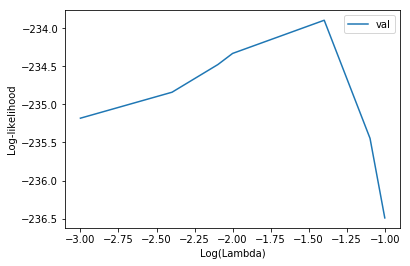

In [10]:
list_lambda=[0.001,0.004,0.008,0.01,0.04,0.08,0.1]
llist_val = []
losslist_val = []
for l in list_lambda:
    optimal_theta = fit_logistic_reg(Xtrain_s, ytrain_s, f_objective, l)
    val_loss = loglikelihood(Xval_s, yval_s, optimal_theta)
    llist_val.append(math.log10(l))
    losslist_val.append(val_loss)
    print(val_loss)
# plt.plot(llist_train,losslist_train,label="train")
plt.plot(llist_val,losslist_val,label="val")
plt.legend()   
plt.xlabel('Log(Lambda)')
plt.ylabel('Log-likelihood')
plt.show()

### The best lambda regularization parameter maximizes the log-likelihood on the validation set is 0.04

## 3.3.5

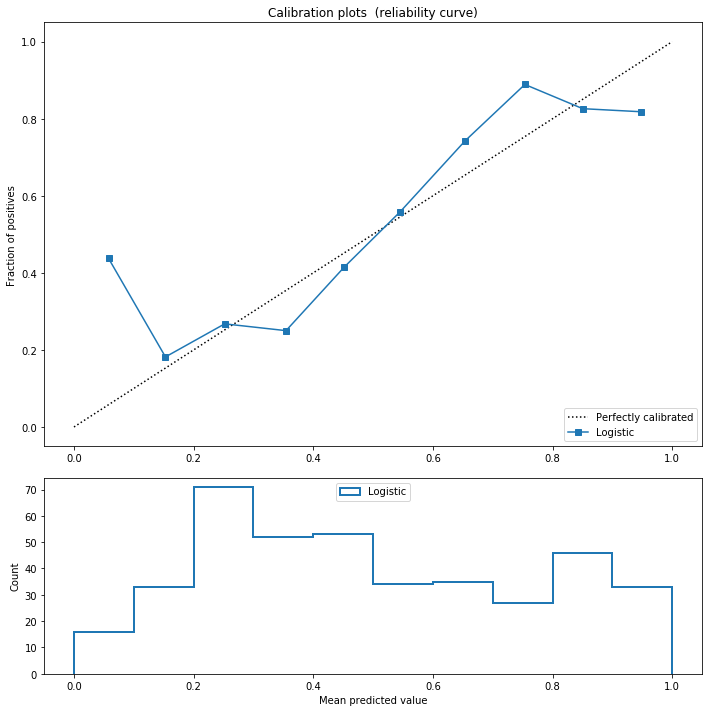

In [12]:
from sklearn import datasets
from sklearn.calibration import calibration_curve


plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

optimal_theta = fit_logistic_reg(Xtrain_s, ytrain_s, f_objective, 0.04)
n, num_ftrs = Xval_s.shape
prob_pos = np.dot(Xval_s,optimal_theta)
for i in range(n):
    prob_pos[i] = 1/(1+np.exp(-prob_pos[i]))
    
prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

fraction_of_positives, mean_predicted_value = calibration_curve(yval_s, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="%s" % ('Logistic'))

ax2.hist(prob_pos, range=(0, 1), bins=10, label='Logistic',
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

The x axis reprents the mean predicted probability in each bin, while the y axis represents the true probability in each bin (fraction of positives). For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.(source:http://scikit-learn.org/stable/modules/calibration.html).

For my logistic model, the performance of bins from 0.1-0.9 performs good, especially 0.1-0.3, while 0-0.1 and 0.9-1 perform not well. The reason may be related to the data sample data amount. Because the best performance bins have higher sample data counts.